# multi-hazard prediction pre-processing

loading the NASA dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NOAA_data= pd.read_csv("data/us_landslide_data.csv")

In [3]:
NOAA_data.columns

Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')


Number of unique values in 'landslide_category':
landslide_category
landslide              1580
mudslide                964
rock_fall               236
debris_flow             107
complex                  61
other                    14
unknown                  11
riverbank_collapse        4
snow_avalanche            4
creep                     4
lahar                     3
translational_slide       2
earth_flow                2
Name: count, dtype: int64


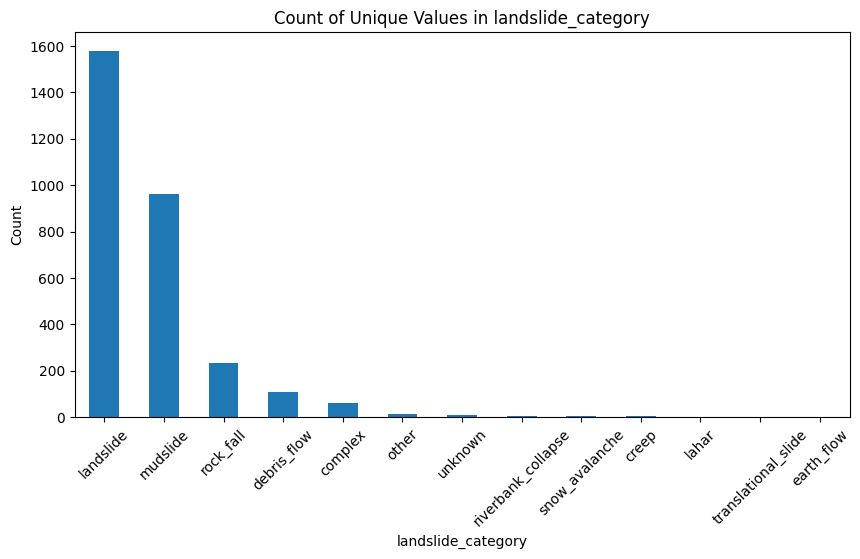


Number of unique values in 'landslide_size':
landslide_size
small         1120
medium        1045
unknown        768
large           53
very_large       6
Name: count, dtype: int64


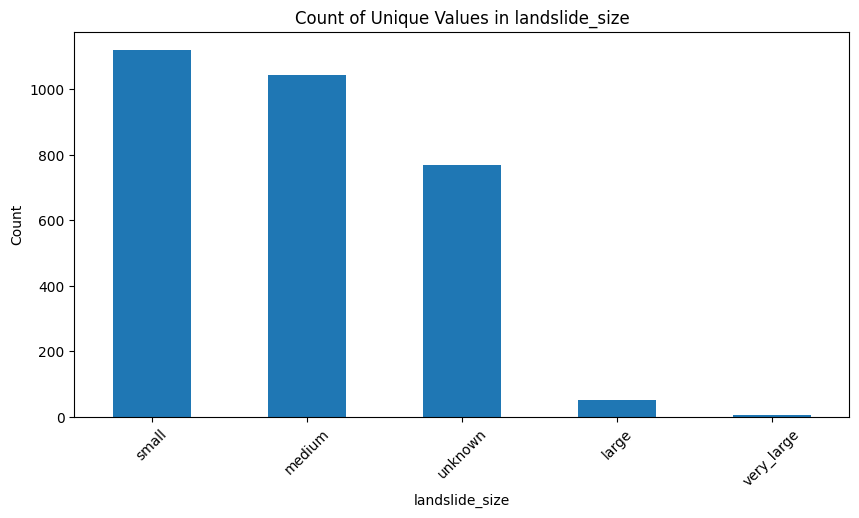


Number of unique values in 'landslide_trigger':
landslide_trigger
downpour                   1098
unknown                    1085
rain                        595
continuous_rain              99
snowfall_snowmelt            29
flooding                     22
freeze_thaw                  18
tropical_cyclone             13
no_apparent_trigger          10
construction                  8
other                         6
mining                        4
earthquake                    3
dam_embankment_collapse       2
Name: count, dtype: int64


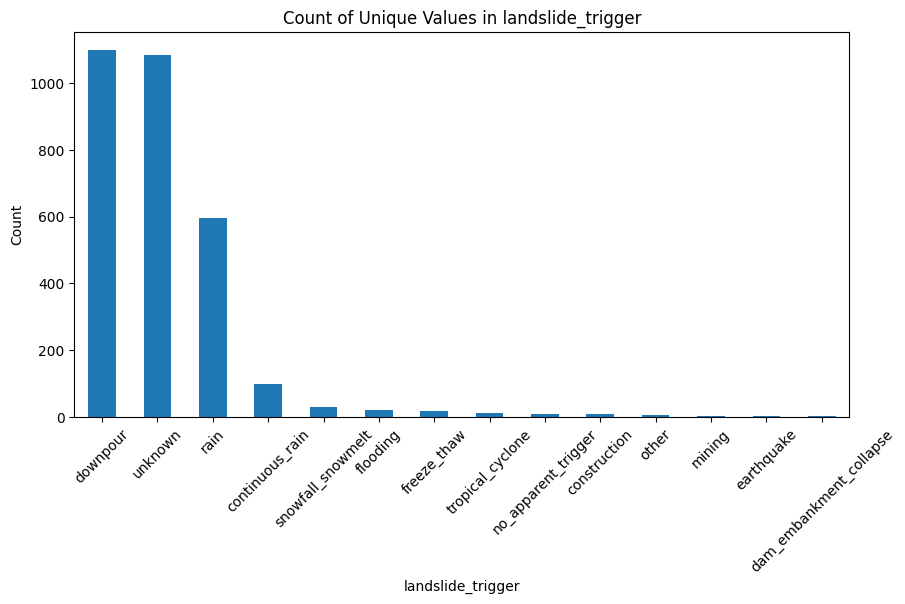

In [4]:

# Columns to analyze
columns_to_analyze = ['landslide_category', 'landslide_size', 'landslide_trigger']

# Count unique values for each column and visualize
for column in columns_to_analyze:
    # Count the number of occurrences for each unique value
    value_counts = NOAA_data[column].value_counts()
    
    # Print the counts
    print(f"\nNumber of unique values in '{column}':")
    print(value_counts)
    
    # Plot the counts as a bar chart
    plt.figure(figsize=(10, 5))
    value_counts.plot(kind='bar')
    plt.title(f'Count of Unique Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [5]:
# Define the mapping to combine categories
category_mapping = {
    'landslide': 'landslide',
    'rock_fall': 'landslide',
    'mudslide': 'mudslide',
    'debris_flow': 'mudslide',
    'lahar': 'mudslide',
    'complex': 'other',
    'other': 'other',
    'unknown': 'other',
    'riverbank_collapse': 'other',
    'snow_avalanche': 'other',
    'creep': 'other',
    'translational_slide': 'other',
    'earth_flow': 'other'
}

# Apply the mapping to the 'landslide_category' column
NOAA_data['landslide_category'] = NOAA_data['landslide_category'].map(category_mapping)


In [6]:
# Define the mapping to combine categories
trigger_mapping = {
    'downpour': 'downpour',
    'rain': 'rain',
    'continuous_rain': 'rain',
    'unknown': 'unknown',
    'snowfall_snowmelt': 'other',
    'flooding': 'other',
    'freeze_thaw': 'other',
    'tropical_cyclone': 'other',
    'no_apparent_trigger': 'other',
    'construction': 'other',
    'other': 'other',
    'mining': 'other',
    'earthquake': 'other',
    'dam_embankment_collapse': 'other'
}

# Apply the mapping to the 'landslide_trigger' column
NOAA_data['landslide_trigger'] = NOAA_data['landslide_trigger'].map(trigger_mapping)


In [7]:
# Define the mapping to combine categories in 'landslide_size'
size_mapping = {
    'small': 'small',
    'medium': 'medium',
    'unknown': 'unknown',
    'large': 'large',
    'very_large': 'large'
}

# Apply the mapping to the 'landslide_size' column
NOAA_data['landslide_size'] = NOAA_data['landslide_size'].map(size_mapping)

In [8]:
# # Save the preprocessed data to a new CSV file
# NOAA_data.to_csv('data/processed_USA_data.csv', index=False)

# print("Data has been saved to 'processed_NOAA_data.csv'")


Other code for Rule based Method

In [12]:
filtered_data = NOAA_data[NOAA_data['landslide_trigger'] == 'downpour']


In [13]:
filtered_data

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
1,The Spokesman-Review,http://www.spokesman.com/stories/2012/mar/31/f...,4290,03/30/2012 12:00:00 AM,NaN,"Pend Oreille County, State Route 20 near Usk, OR","In Pend Oreille County, a mudslide on State Ro...","Pend Oreille County, State Route 20 near Usk, OR",5km,mudslide,...,US,Washington,2126.0,Newport,19.97241,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-117.2665,48.2797
9,Corvallis Gazette-Times,http://www.gazettetimes.com/news/local/floodwa...,962,01/07/2009 12:00:00 AM,NaN,"Concrete, 70 miles northeast of Seattle,Washin...",Rainfall totals for the 24 hours ending at 2 p...,"Concrete, 70 miles northeast of Seattle,Washin...",5km,landslide,...,US,Washington,1347.0,Darrington,33.29411,09/15/2014 05:52:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-121.7500,48.5380
16,Drilling Today,http://dthrotarydrilling.com/News/24-april/VDO...,1010,04/20/2009 09:00:00 AM,NaN,"Route 39 in Rockbridge County, Virginia",STAUNTON – The Virginia Department of Transpor...,"Route 39 in Rockbridge County, Virginia",1km,mudslide,...,US,Virginia,1463.0,East Lexington,13.41471,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-79.4305,37.9137
17,Alaska Business,http://www.akbizmag.com/Alaska-Business-Monthl...,1181,09/20/2009 06:30:00 PM,NaN,"Mile point 5.4 on Mitkof Highway, Petersburg, ...","On Sunday, a mudslide came down at mile point ...","Mile point 5.4 on Mitkof Highway, Petersburg, ...",10km,mudslide,...,US,Alaska,2369.0,Wrangell,23.55928,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-132.7269,56.5561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,deltacountyindependent,http://www.deltacountyindependent.com/news/top...,3766,07/12/2011 06:00:00 PM,NaN,"Paonia, CO",The heavy rains have brought mudslides to down...,"Paonia, CO",5km,mudslide,...,US,Colorado,1451.0,Paonia,0.01994,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-107.5920,38.8685
2983,chillicothegazette,http://www.chillicothegazette.com/article/2011...,3405,04/24/2011 12:00:00 AM,NaN,"US 52, near Sugar Grove, 4 mi west of Portsmou...",CHILLICOTHE — Continued rains and even a pair ...,"US 52, near Sugar Grove, 4 mi west of Portsmou...",1km,mudslide,...,US,Ohio,3149.0,West Portsmouth,6.43139,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-83.0697,38.7100
2985,fresnobee,http://www.fresnobee.com/local/story/1793572.html,1440,01/22/2010 12:00:00 AM,NaN,"Highway 41 from Highway 33 to Highway 46, CA",A mudslide closed Highway 41 from Highway 33 t...,"Highway 41 from Highway 33 to Highway 46, CA",10km,mudslide,...,US,California,1295.0,Shandon,24.12478,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-120.1521,35.7740
2990,The Press Democrat,http://www.pressdemocrat.com/article/20110217/...,3133,02/17/2011 09:00:00 AM,NaN,"Sonoma county, CA","Thursday, February 17, 2011 at 3:25 p.m. A w...","Sonoma county, CA",unknown,landslide,...,US,California,4534.0,Guerneville,4.80321,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.9542,38.4738


In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('data/extracted_preciption_data_csv/era_5_precipitation_avg_data.csv')

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(data.head())


   id  avg_precip_24h_early  avg_precip_12h_early  avg_precip_current
0  24             55.798731             55.798731            3.075742
1  27              7.124609              7.124609            5.861119
2  30              0.220190              0.220190            0.000000
3  34             12.232368             47.331508           47.331508
4  42              2.622773              2.622773            3.048273


In [20]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('data/extracted_preciption_data_csv/era_5_precipitation_avg_data.csv')

# Assuming you want to categorize based on 'avg_precip_current' for demonstration
# Calculate the quantiles for low, medium, and high categories
quantiles = data['avg_precip_current'].quantile([0.33, 0.66])

# Function to categorize precipitation
def categorize_precip(precip):
    if precip <= quantiles.iloc[0]:
        return 'Low'
    elif precip <= quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization
data['precip_category'] = data['avg_precip_current'].apply(categorize_precip)

# Print the categories and the range for each
print("Low range: 0 to", quantiles.iloc[0])
print("Medium range:", quantiles.iloc[0], "to", quantiles.iloc[1])
print("High range: greater than", quantiles.iloc[1])

# Display the first few rows to verify the categorization
print(data.head())


Low range: 0 to 1.8470107912200011
Medium range: 1.8470107912200011 to 13.107414469200007
High range: greater than 13.107414469200007
   id  avg_precip_24h_early  avg_precip_12h_early  avg_precip_current  \
0  24             55.798731             55.798731            3.075742   
1  27              7.124609              7.124609            5.861119   
2  30              0.220190              0.220190            0.000000   
3  34             12.232368             47.331508           47.331508   
4  42              2.622773              2.622773            3.048273   

  precip_category  
0          Medium  
1          Medium  
2             Low  
3            High  
4          Medium  
